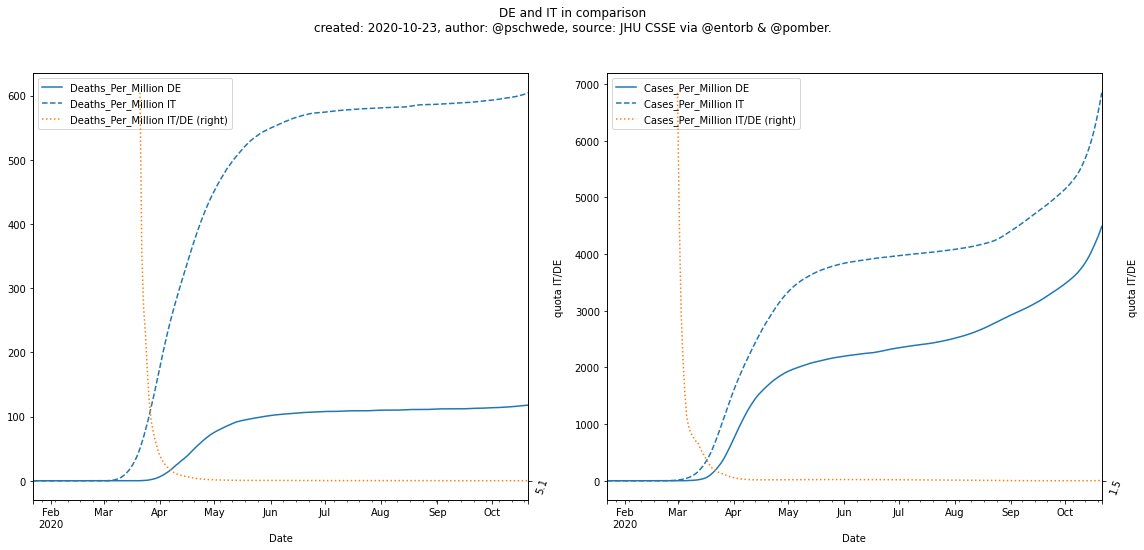

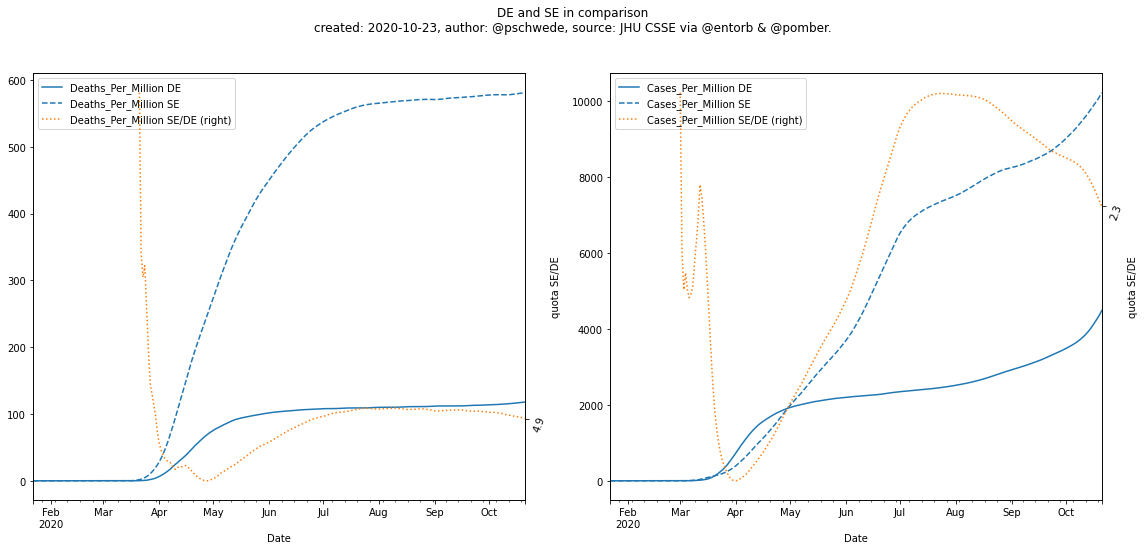

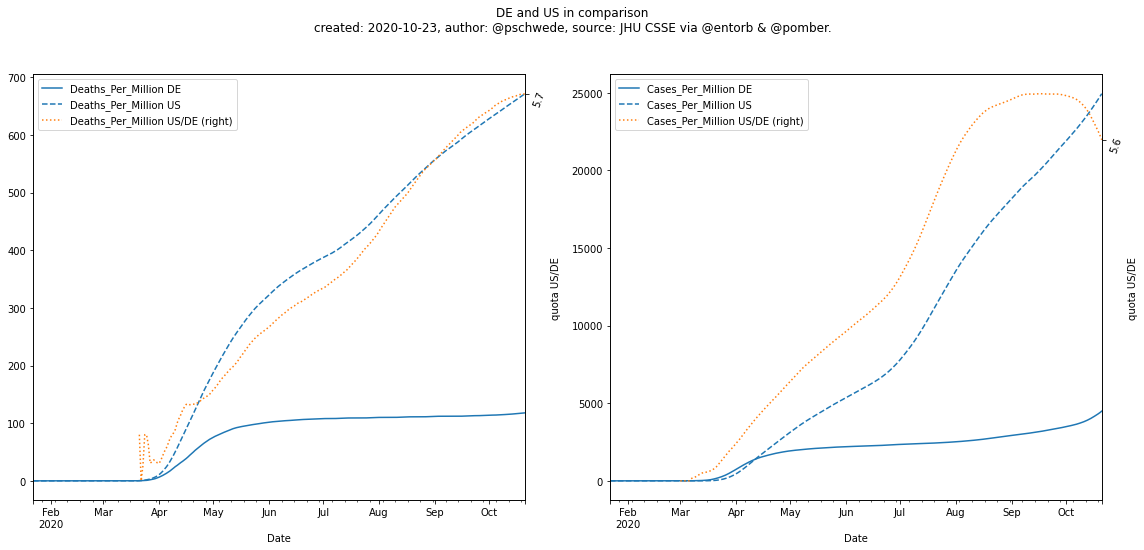

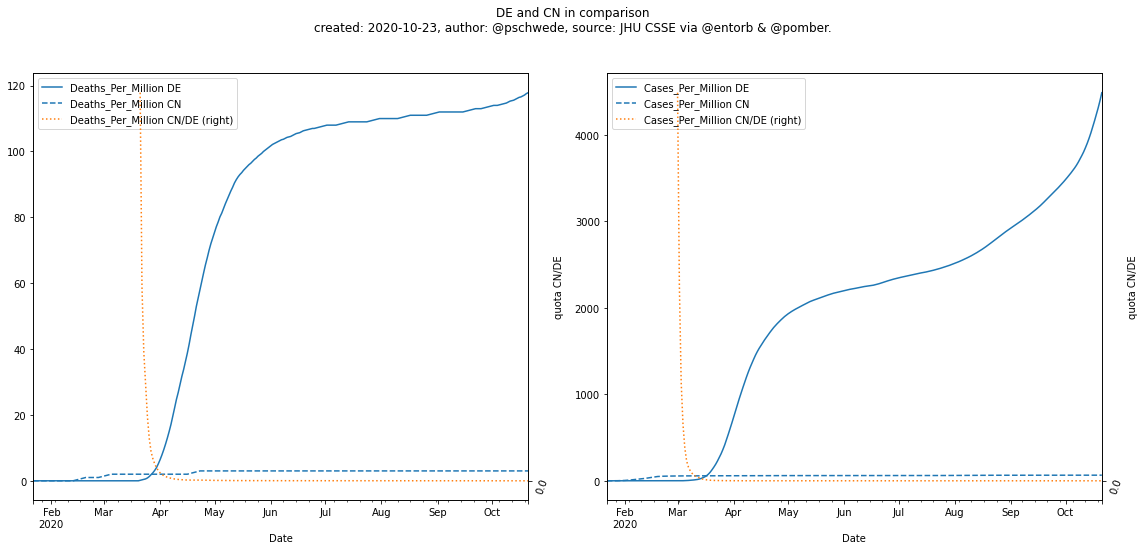

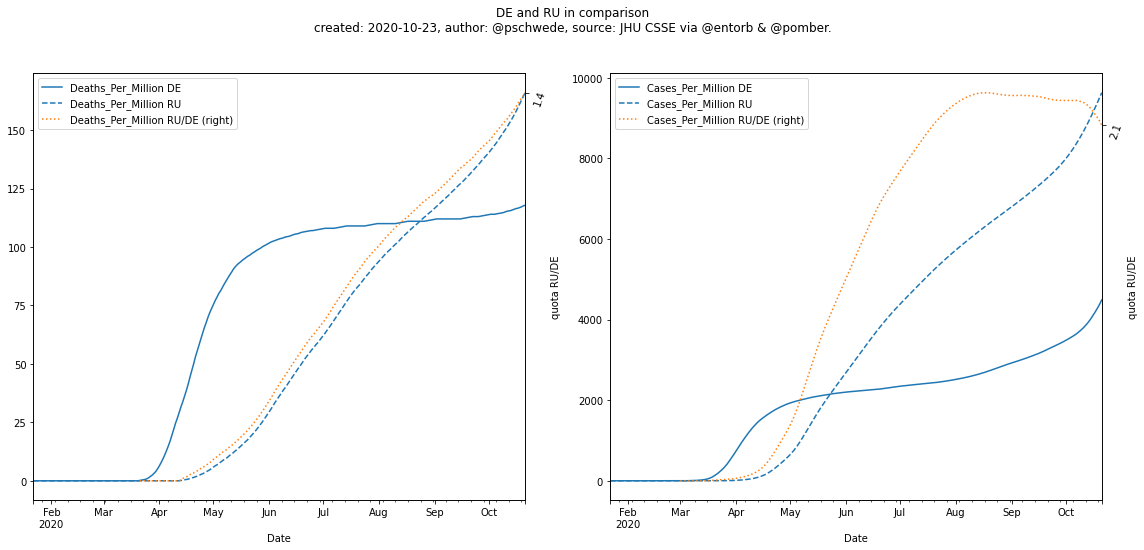

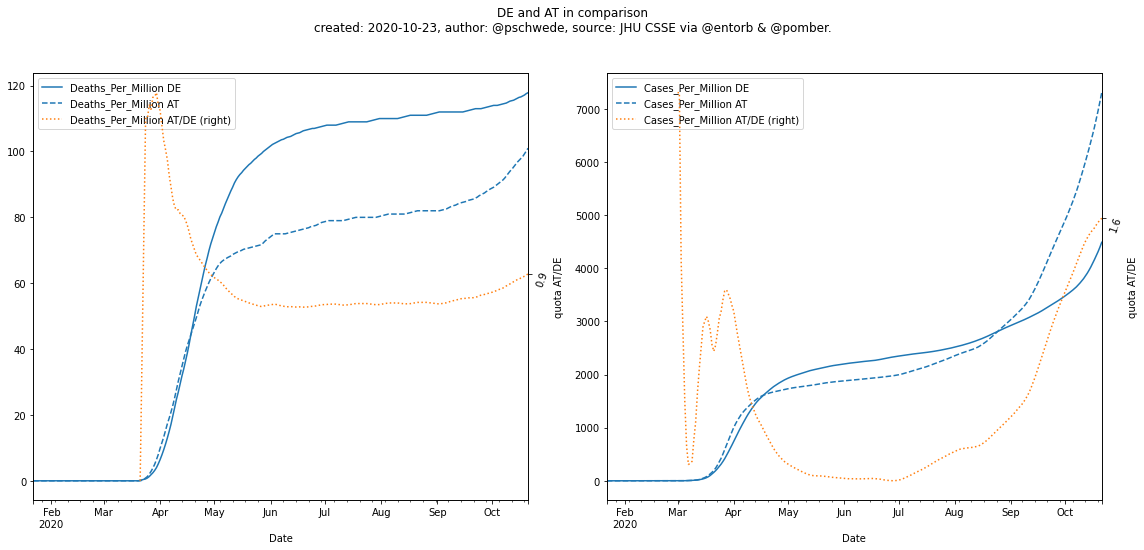

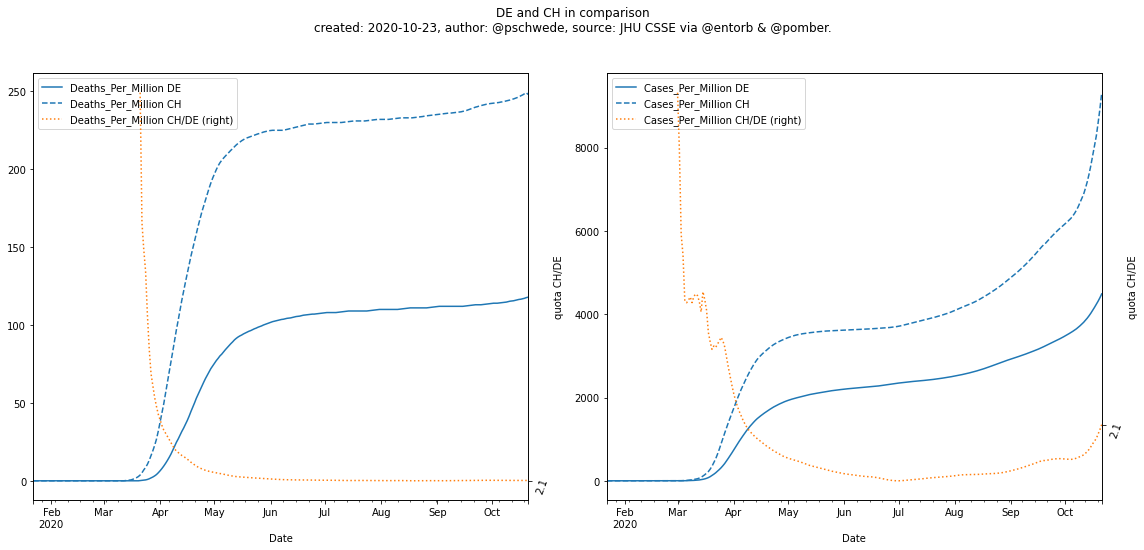

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

from scrape import entorb

areas = pd.read_csv("data/areas-wikidata.tsv", sep='\t', index_col='co', na_filter=False)
def get_area(co):
    return areas.loc[co]['area']

fst = 'DE'
for snd in ['IT', 'SE', 'US', 'CN', 'RU', 'AT', 'CH']:
    de = entorb.to_dataframe(nation=fst).rolling('7D').mean()
    se = entorb.to_dataframe(nation=snd).rolling('7D').mean()
    df = se / de

    fig, axes = plt.subplots(ncols=2, nrows=1)
    for ax, to_compare in zip(axes.flat, ['Deaths_Per_Million',
                                          'Cases_Per_Million']):
        de[to_compare].plot(ax=ax, label="%s %s" % (to_compare, fst))
        se[to_compare].plot(ax=ax, label="%s %s" % (to_compare, snd),
                            linestyle='--', color=ax.lines[-1].get_color())
        ax2 = df[to_compare].plot(ax=ax,
                                  label="%s %s/%s (right)" % (to_compare, snd, fst),
                                  secondary_y=True,
                                  linestyle=':' )
        yticks=[df[to_compare].replace(np.inf, np.nan).tail(1).values[0]]
        ax2.set_yticks(yticks)
        ax2.set_yticklabels(["%.1f" % y for y in yticks], rotation=70)
        ax2.set_ylabel("quota %s/DE" % snd)
        ax.legend(handles=ax.lines + ax2.lines, loc='upper left')
    fig.set_size_inches(16,8)
    now = datetime.datetime.now()
    fig.suptitle(("%s and %s in comparison\n"
                  "created: %04d-%02d-%02d, "
                  "author: @pschwede, "
                  "source: JHU CSSE via @entorb & @pomber.") % (fst, snd, now.year, now.month, now.day))
    fig.set_facecolor('w')
    fig.tight_layout(rect=(0, 0.03, 1, 0.95))
    plt.show()

In [2]:
cos = []

for co in [co for co in areas.index if co]:
    try:
        entorb.to_dataframe(nation=co)
        float(areas.loc[co]['area'])
        cos.append(co)
    except Exception:
        pass

In [3]:
df = pd.DataFrame({'co': cos, 'area':[float(areas.loc[co]['area']) for co in cos], 'infections':[entorb.to_dataframe(nation=co)['Deaths_Per_Million'].mean() for co in cos]})
df['sqrt(area)'] = df['area'].pow(0.5)
df['infections*sqrt(area)'] = df['infections'] / df['sqrt(area)']

array([[<AxesSubplot:title={'center':'area'}>,
        <AxesSubplot:title={'center':'infections'}>],
       [<AxesSubplot:title={'center':'sqrt(area)'}>,
        <AxesSubplot:title={'center':'infections*sqrt(area)'}>]],
      dtype=object)

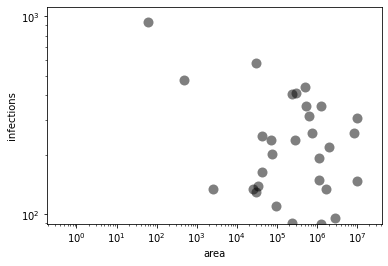

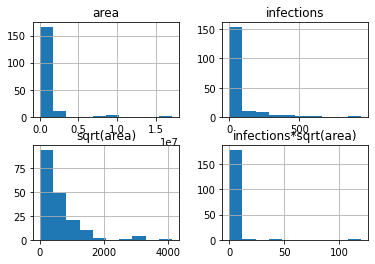

In [4]:
df.plot.scatter(x='area', y='infections', c='black', lw=0, s=100, alpha=0.5, logx=True, logy=True)
df.hist()